In [127]:
import os
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd
from matplotlib.patches import Patch
import pandas as pd
import seaborn as sns
import fastcluster

In [98]:
mobsuite = pd.read_csv('02282023_EcoliARETE_isolates_crosstab_nonovel_mobsuite_ALL.csv')

In [99]:
mobsuite.head()

,row_0,AA144,AA151,AA152,AA155,AA159,AA161,AA162,AA163,AA172,...,AD690,AE322,AE638,AF098,AF190,AF232,AF267,AG401,AH156,All
0,EC_0012_1H1_D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,EC_0012_2H1_D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2,EC_0012_2L1_D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,EC_0012_3S1_D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,EC_0012_C1_H,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [100]:
mobsuite["Source"]=mobsuite['row_0'].str.split('_').str[-1]

In [101]:
mobsuite['Source'] = mobsuite['Source'].replace({'D':'Diseased', 'H':'Cecal', 'E':'Environmental'})

In [102]:
mobsuite['Outbreak'] = 'F' + mobsuite['row_0'].str.extract(r'^[A-Z]+_(\d+)_', expand=False)

In [103]:
mobsuite2 = mobsuite.drop(mobsuite.index[len(mobsuite)-1])

In [104]:
mobsuite3 = mobsuite2.drop(['All'], axis=1)

In [105]:
mobsuite3

,row_0,AA144,AA151,AA152,AA155,AA159,AA161,AA162,AA163,AA172,...,AE322,AE638,AF098,AF190,AF232,AF267,AG401,AH156,Source,Outbreak
0,EC_0012_1H1_D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Diseased,F0012
1,EC_0012_2H1_D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Diseased,F0012
2,EC_0012_2L1_D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Diseased,F0012
3,EC_0012_3S1_D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Diseased,F0012
4,EC_0012_C1_H,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Cecal,F0012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,EC_E4BE_1_E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Environmental,NaN
240,EC_E4DI_1_E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Environmental,NaN
241,EC_E4P_1_E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Environmental,NaN
242,EC_E9FP_1_E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Environmental,NaN


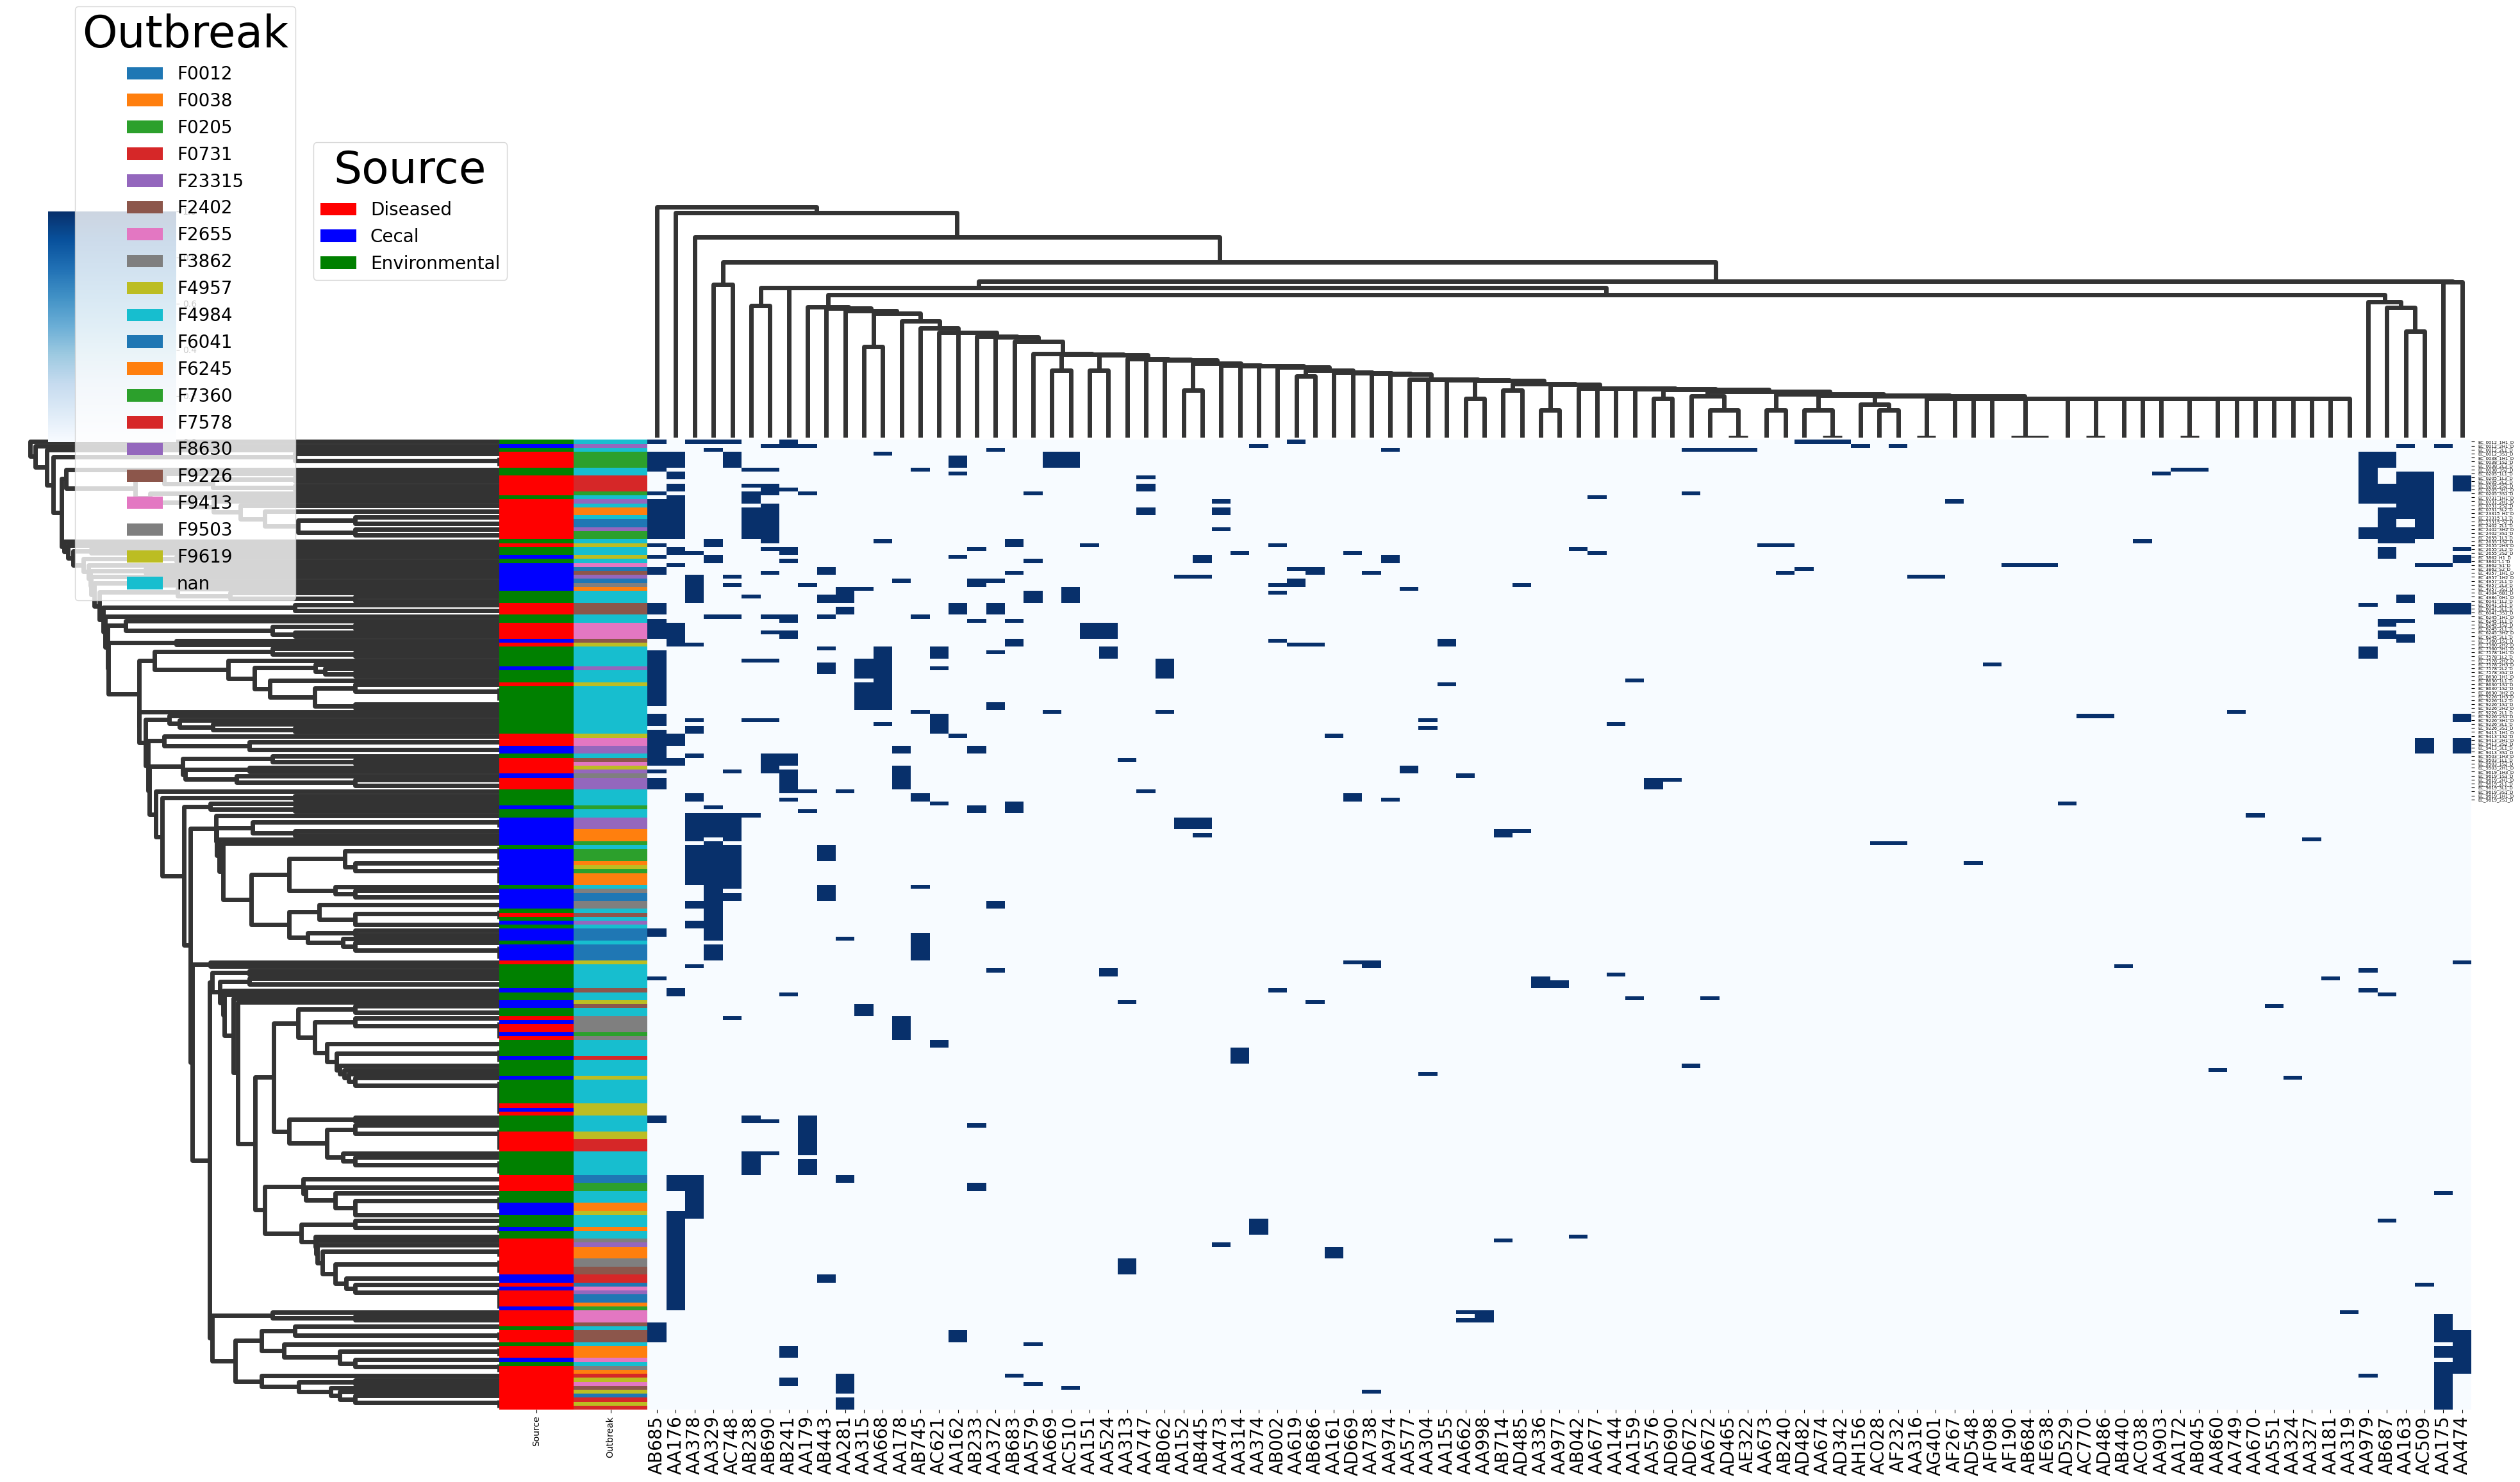

In [106]:
#make the clustermap
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline


NUMERICAL_COLS = mobsuite3.columns[1:98]
Source=mobsuite3["Source"]

pal = sns.color_palette(("r", "b", "g"), len(mobsuite3.Source.unique()))
lut = dict(zip(mobsuite3.Source.unique(), pal))
sources = mobsuite3.Source
colors = pd.Series(sources).map(lut) 


pal2 = sns.color_palette(("tab10"), len(mobsuite3.Outbreak.unique()))
lut2 = dict(zip(mobsuite3.Outbreak.unique(), pal2))
other_variable = mobsuite3.Outbreak
colors2 = pd.Series(other_variable).map(lut2)
#Source = mobsuite3["Source"]
#Outbreak = mobsuite3["Outbreak"] 
#pal = sns.color_palette(("tab 10"), len(mobsuite3.Source.unique()) + len(mobsuite3.Outbreak.unique()))
#lut = dict(zip(mobsuite3.Source.unique(), pal[:len(mobsuite3.Source.unique())]))
#lut_cluster = dict(zip(mobsuite3.Outbreak.unique(), pal[len(mobsuite3.Source.unique()):]))
#lut.update(lut_cluster)
#color = pd.concat([pd.Series(Sources).map(lut), pd.Series(Outbreak).map(lut)]
combined_colors = pd.concat([colors, colors2], axis=1)

g =sb.clustermap(mobsuite3[NUMERICAL_COLS],metric="euclidean", figsize=(40,20),cmap="Blues", standard_scale=1, row_colors=combined_colors, yticklabels= mobsuiteD2['row_0'],row_cluster=True,col_cluster=True,tree_kws=dict(linewidths=5))


g.dendrogram_col.linkage 
g.dendrogram_row.linkage
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 20, rotation = 90)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 5, rotation = 360)
 


handles = [Patch(facecolor=lut[name]) for name in lut]
a = plt.legend(handles, lut, title='Source', loc="center left", bbox_to_anchor=(2, 1), fontsize= 20)
a.get_title().set_fontsize('50')


handles2 = [Patch(facecolor=lut2[name]) for name in lut2]
legend2 = plt.legend(handles2, lut2, title='Outbreak', loc="center right", bbox_to_anchor=(2, 0.6), fontsize=20)
legend2.get_title().set_fontsize('50')
plt.gca().add_artist(a)


plot.savefig("04032022_EcoliARETE_HC_All_Isolates_smaller_font_OutbreakIncluded.pdf", dpi =900, bbox_inches= "tight")


In [107]:
mobsuite3

,row_0,AA144,AA151,AA152,AA155,AA159,AA161,AA162,AA163,AA172,...,AE322,AE638,AF098,AF190,AF232,AF267,AG401,AH156,Source,Outbreak
0,EC_0012_1H1_D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Diseased,F0012
1,EC_0012_2H1_D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Diseased,F0012
2,EC_0012_2L1_D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Diseased,F0012
3,EC_0012_3S1_D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Diseased,F0012
4,EC_0012_C1_H,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Cecal,F0012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,EC_E4BE_1_E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Environmental,NaN
240,EC_E4DI_1_E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Environmental,NaN
241,EC_E4P_1_E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Environmental,NaN
242,EC_E9FP_1_E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Environmental,NaN


In [108]:
mobsuiteD = mobsuite3[mobsuite3['Source'].str.contains('Diseased')]

In [109]:
mobsuiteC = mobsuite3[mobsuite3['Source'].str.contains('Cecal')]

In [110]:
mobsuiteE = mobsuite3[mobsuite3['Source'].str.contains('Environmental')]

In [111]:
mobsuiteDC = mobsuite3[~mobsuite3['Source'].str.contains('Environmental')]

In [112]:
mobsuiteD

,row_0,AA144,AA151,AA152,AA155,AA159,AA161,AA162,AA163,AA172,...,AE322,AE638,AF098,AF190,AF232,AF267,AG401,AH156,Source,Outbreak
0,EC_0012_1H1_D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Diseased,F0012
1,EC_0012_2H1_D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Diseased,F0012
2,EC_0012_2L1_D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Diseased,F0012
3,EC_0012_3S1_D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Diseased,F0012
8,EC_0038_1H1_D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Diseased,F0038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,EC_9619_2L1_D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Diseased,F9619
144,EC_9619_3L1_D,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Diseased,F9619
145,EC_9619_3S1_D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Diseased,F9619
236,EC_9619_1H1_D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Diseased,F9619


In [113]:
mobsuiteD2 = mobsuiteD.loc[:, (mobsuiteD != 0).any(axis=0)]

In [114]:
mobsuiteD2

,row_0,AA151,AA155,AA161,AA162,AA163,AA175,AA176,AA178,AA179,...,AB714,AC509,AC510,AC748,AD669,AD672,AD690,AF267,Source,Outbreak
0,EC_0012_1H1_D,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,Diseased,F0012
1,EC_0012_2H1_D,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,Diseased,F0012
2,EC_0012_2L1_D,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,Diseased,F0012
3,EC_0012_3S1_D,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,Diseased,F0012
8,EC_0038_1H1_D,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,Diseased,F0038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,EC_9619_2L1_D,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,Diseased,F9619
144,EC_9619_3L1_D,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,Diseased,F9619
145,EC_9619_3S1_D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,Diseased,F9619
236,EC_9619_1H1_D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Diseased,F9619


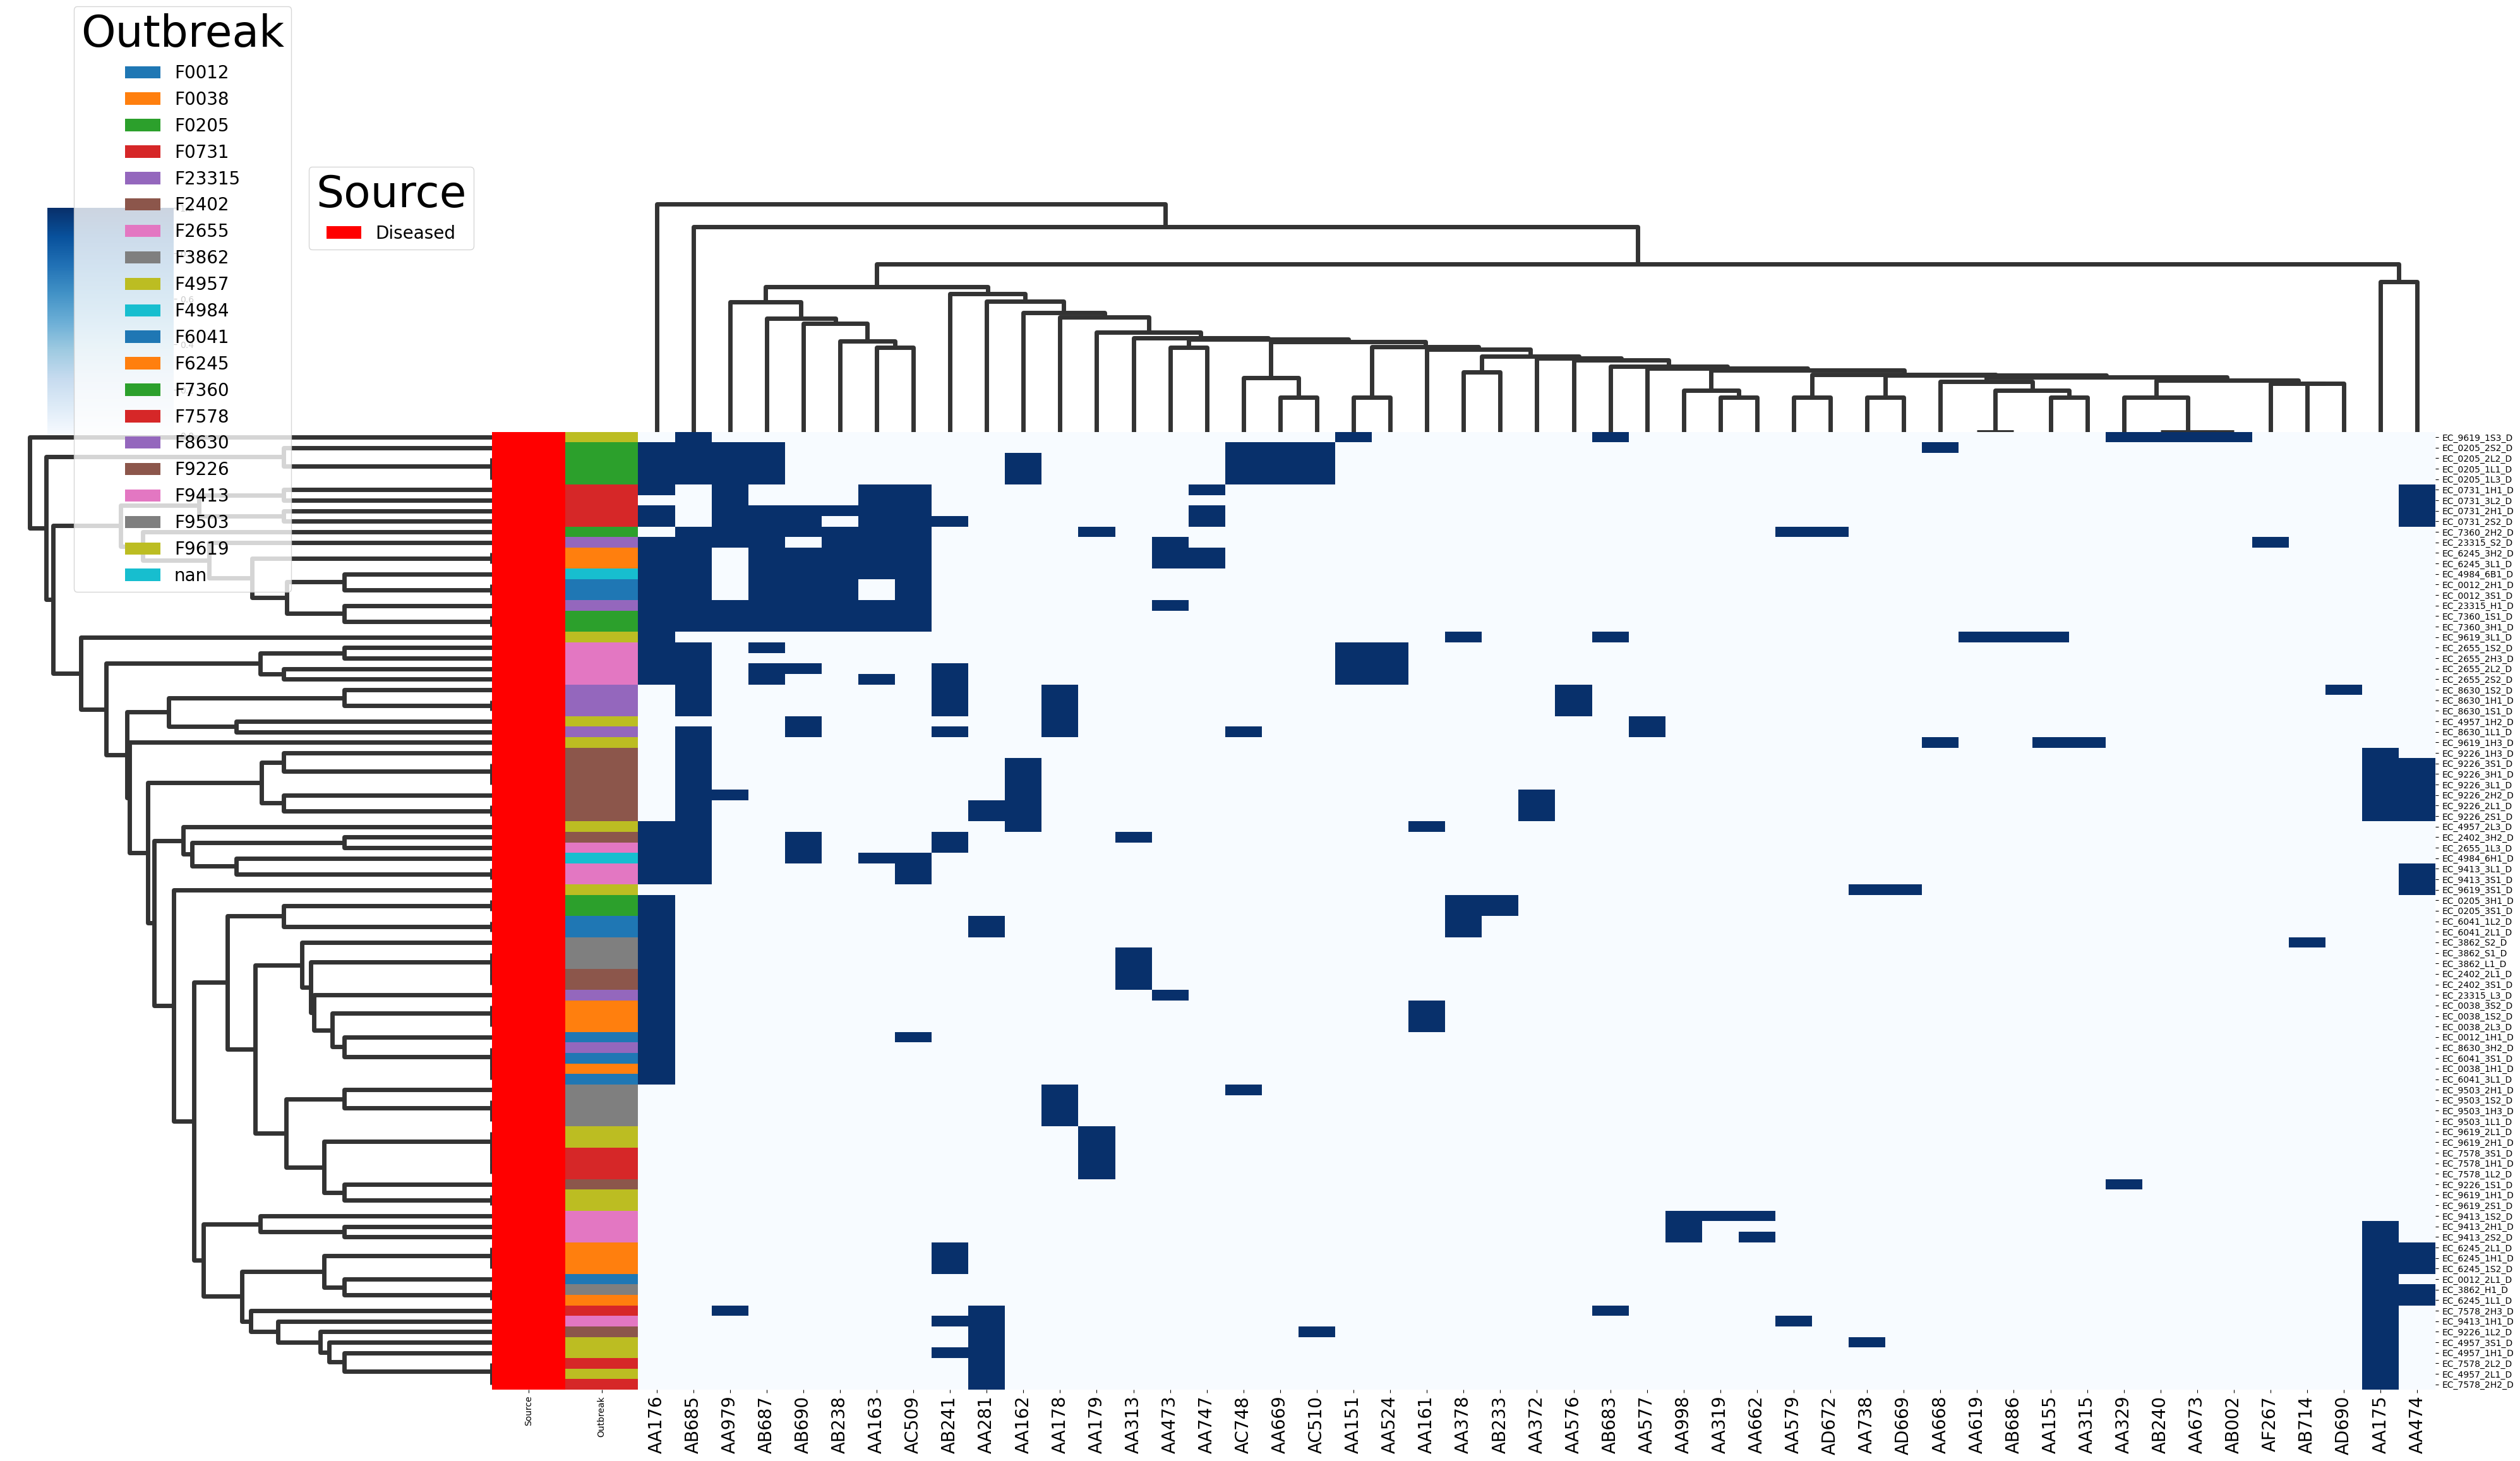

In [115]:
#make the clustermap
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline


NUMERICAL_COLS = mobsuiteD2.columns[1:50]
Source=mobsuiteD["Source"]

pal = sns.color_palette(("r", "b", "g"), len(mobsuiteD2.Source.unique()))
lut = dict(zip(mobsuiteD2.Source.unique(), pal))
sources = mobsuiteD2.Source
colors = pd.Series(sources).map(lut)          

pal2 = sns.color_palette(("tab10"), len(mobsuite3.Outbreak.unique()))
lut2 = dict(zip(mobsuite3.Outbreak.unique(), pal2))
other_variable = mobsuite3.Outbreak
colors2 = pd.Series(other_variable).map(lut2)

combined_colors = pd.concat([colors, colors2], axis=1)




g =sb.clustermap(mobsuiteD2[NUMERICAL_COLS],metric="euclidean", figsize=(40,20),cmap="Blues", standard_scale=1,row_colors=combined_colors, yticklabels= mobsuiteD2['row_0'],row_cluster=True,col_cluster=True,tree_kws=dict(linewidths=5))
g.dendrogram_col.linkage 
g.dendrogram_row.linkage
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 20, rotation = 90)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 10, rotation = 360)
 

handles = [Patch(facecolor=lut[name]) for name in lut]
a = plt.legend(handles, lut, title='Source', loc="center left", bbox_to_anchor=(2, 1), fontsize= 20)
a.get_title().set_fontsize('50')


handles2 = [Patch(facecolor=lut2[name]) for name in lut2]
legend2 = plt.legend(handles2, lut2, title='Outbreak', loc="center right", bbox_to_anchor=(2, 0.6), fontsize=20)
legend2.get_title().set_fontsize('50')
plt.gca().add_artist(a)


plot.savefig("02282022_EcoliARETE_HC_Diseased_Isolates_smaller_font.pdf", dpi =900, bbox_inches= "tight")

In [116]:
mobsuiteC2 = mobsuiteC.loc[:, (mobsuiteC != 0).any(axis=0)]

In [117]:
mobsuiteC2

,row_0,AA152,AA155,AA162,AA163,AA175,AA176,AA178,AA179,AA281,...,AD482,AD485,AD548,AE638,AF190,AF232,AG401,AH156,Source,Outbreak
4,EC_0012_C1_H,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Cecal,F0012
5,EC_0012_C3_H,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Cecal,F0012
6,EC_0012_C5_H,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Cecal,F0012
7,EC_0012_C7_H,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Cecal,F0012
12,EC_0038_C10_H,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Cecal,F0038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,EC_9503_C3_H,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,Cecal,F9503
146,EC_9619_C1_H,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Cecal,F9619
147,EC_9619_C6_H,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Cecal,F9619
148,EC_9619_C8_H,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Cecal,F9619


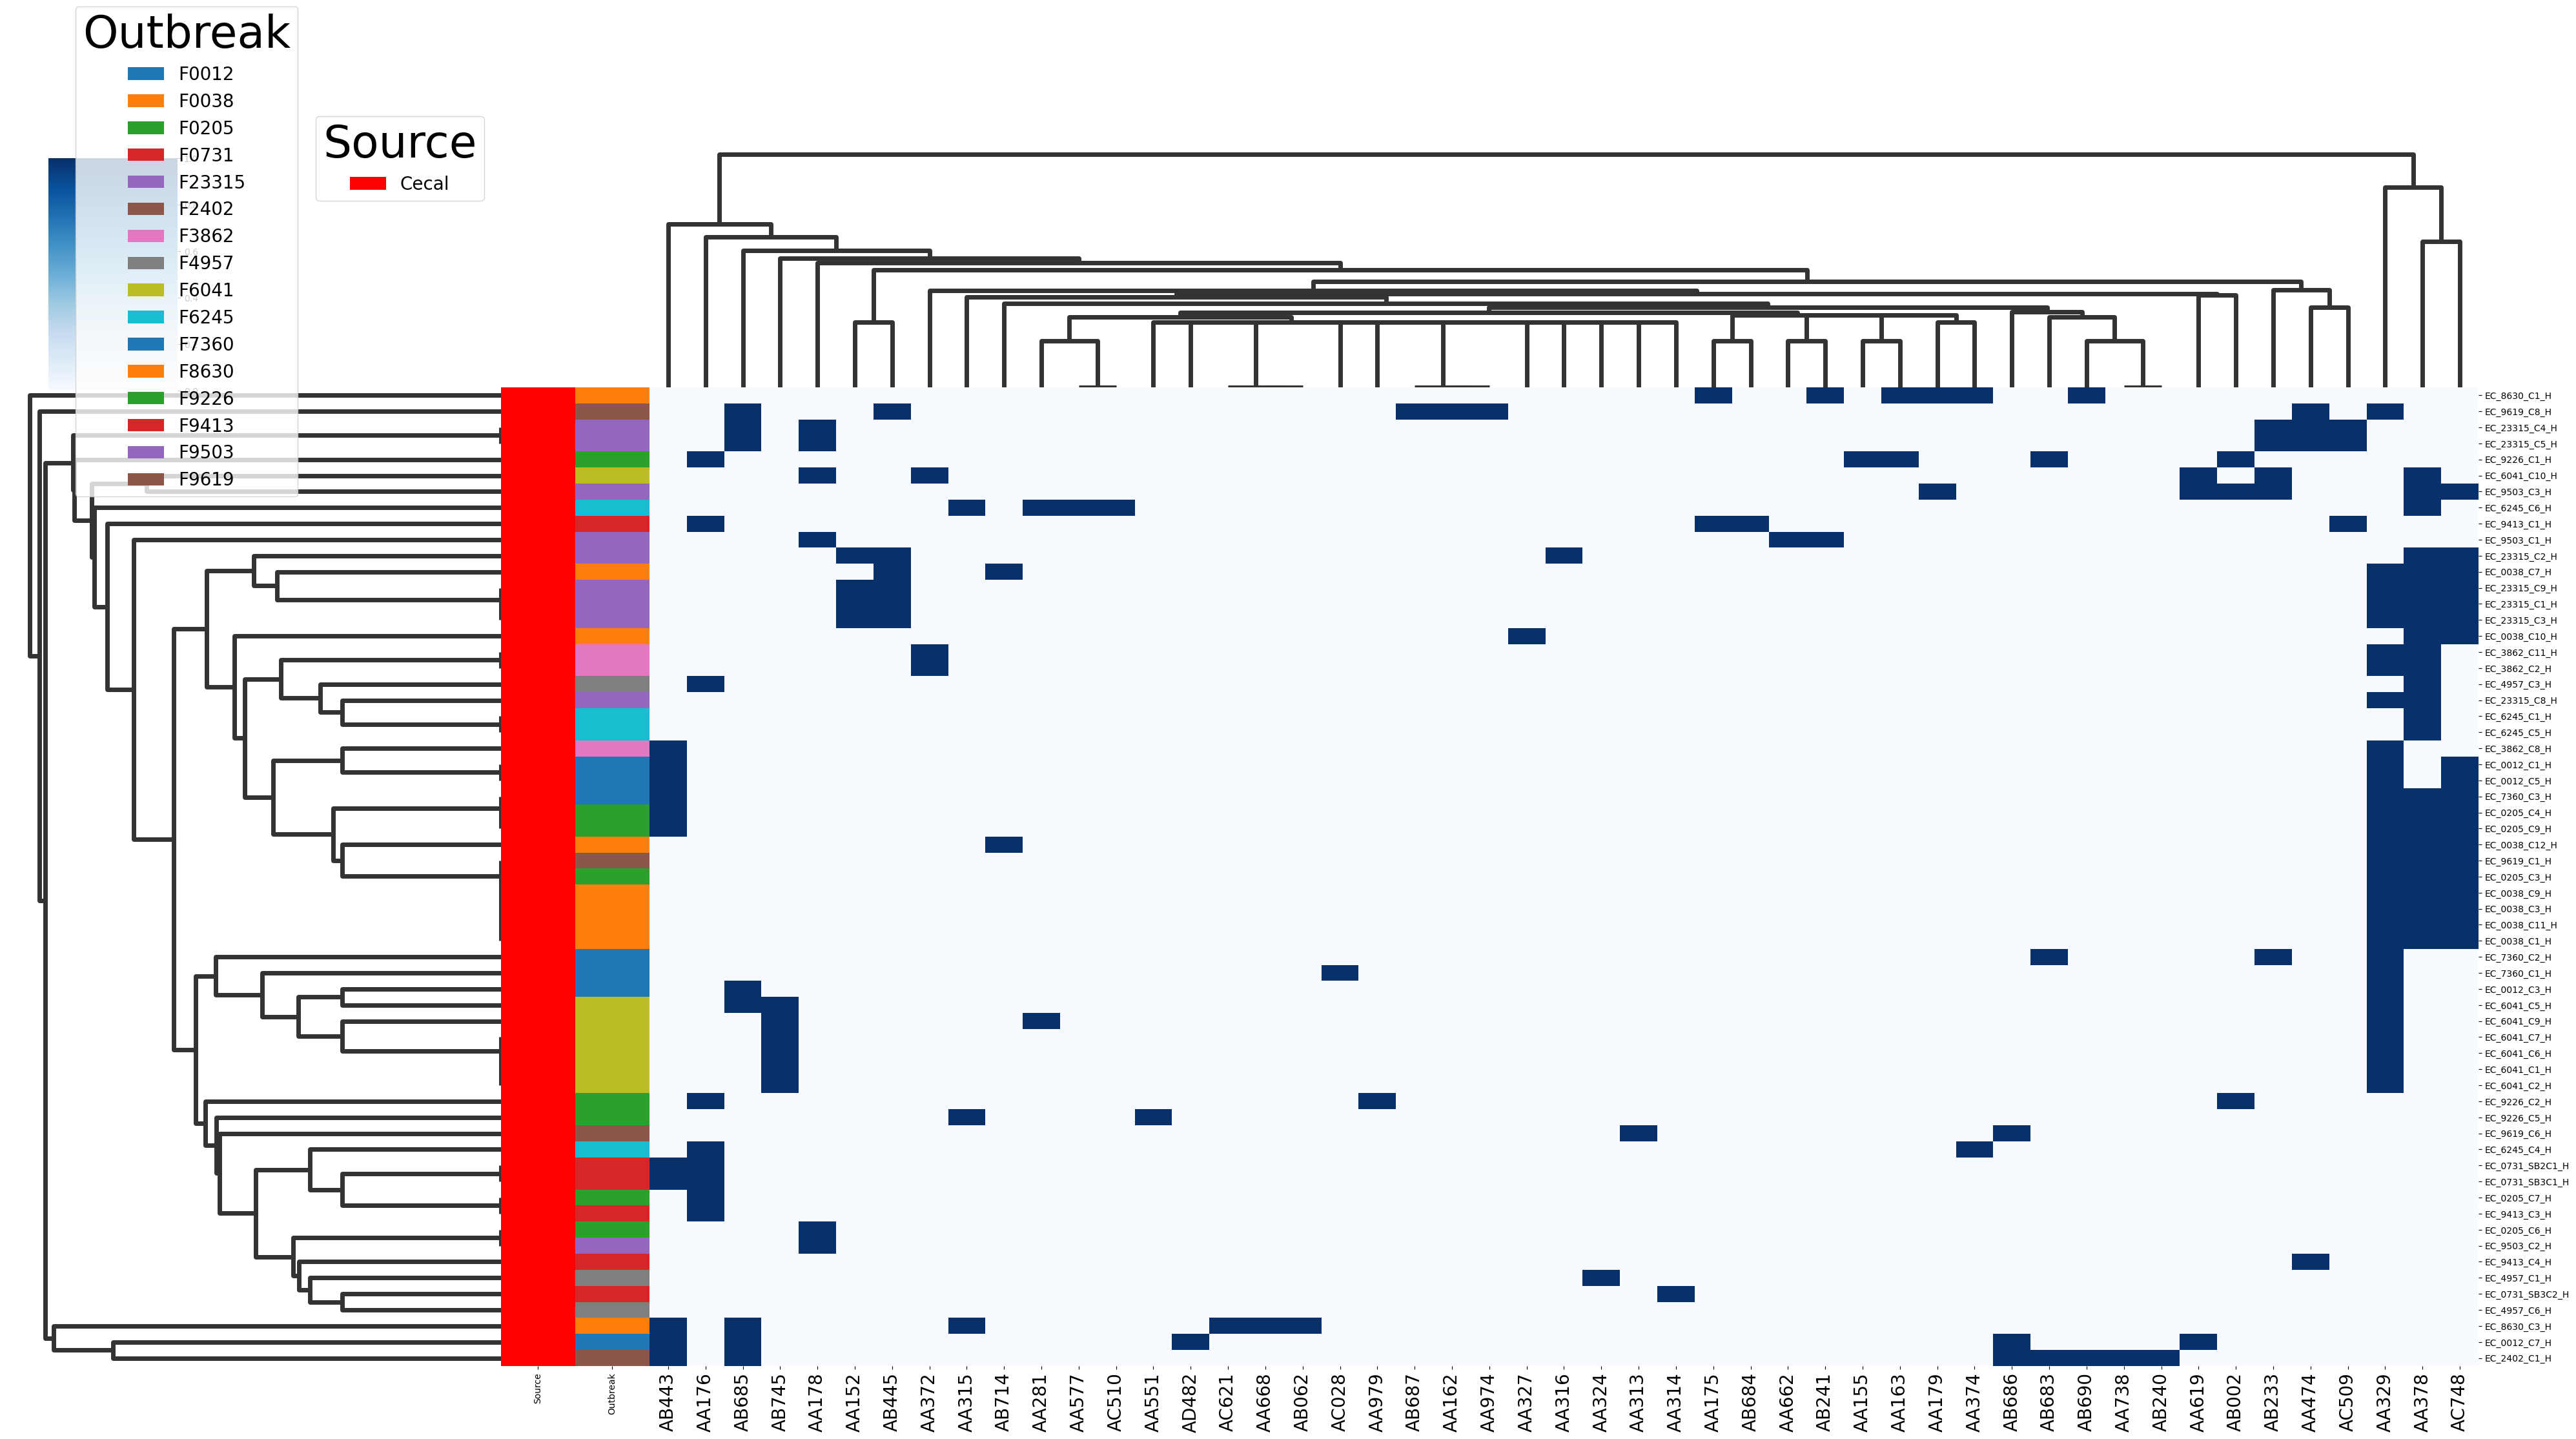

In [118]:
#make the clustermap
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline


NUMERICAL_COLS = mobsuiteC2.columns[1:50]
Source=mobsuiteD["Source"]

pal = sns.color_palette(("r", "b", "g"), len(mobsuiteD2.Source.unique()))
lut = dict(zip(mobsuiteC2.Source.unique(), pal))
sources = mobsuiteC2.Source
colors = pd.Series(sources).map(lut)          

pal2 = sns.color_palette(("tab10"), len(mobsuiteC2.Outbreak.unique()))
lut2 = dict(zip(mobsuiteC2.Outbreak.unique(), pal2))
other_variable = mobsuiteC2.Outbreak
colors2 = pd.Series(other_variable).map(lut2)

combined_colors = pd.concat([colors, colors2], axis=1)
         

g =sb.clustermap(mobsuiteC2[NUMERICAL_COLS],metric="euclidean", figsize=(40,20),cmap="Blues", standard_scale=1,row_colors=combined_colors, yticklabels= mobsuiteC2['row_0'],row_cluster=True,col_cluster=True,tree_kws=dict(linewidths=5))
g.dendrogram_col.linkage 
g.dendrogram_row.linkage
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 20, rotation = 90)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 10, rotation = 360)
 

handles = [Patch(facecolor=lut[name]) for name in lut]
a = plt.legend(handles, lut, title='Source', loc="center left", bbox_to_anchor=(2, 1), fontsize= 20)
a.get_title().set_fontsize('50')


handles2 = [Patch(facecolor=lut2[name]) for name in lut2]
legend2 = plt.legend(handles2, lut2, title='Outbreak', loc="center right", bbox_to_anchor=(2, 0.6), fontsize=20)
legend2.get_title().set_fontsize('50')
plt.gca().add_artist(a)


plot.savefig("02282022_EcoliARETE_HC_Cecal_Isolates_smaller_font.pdf", dpi =900, bbox_inches= "tight")

In [36]:
mobsuiteE2 = mobsuiteE.loc[:, (mobsuiteE != 0).any(axis=0)]

In [37]:
mobsuiteE2

,row_0,AA144,AA159,AA162,AA163,AA172,AA175,AA176,AA179,AA181,...,AD342,AD465,AD482,AD486,AD529,AD669,AD672,AE322,AF098,Source
149,EC_E10BF_1_E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Environmental
150,EC_E10BF_2_E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Environmental
151,EC_E10FP_1_E,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Environmental
152,EC_E10L_1_E,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,Environmental
153,EC_E10L_2_E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Environmental
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,EC_E4BE_1_E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Environmental
240,EC_E4DI_1_E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Environmental
241,EC_E4P_1_E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Environmental
242,EC_E9FP_1_E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Environmental


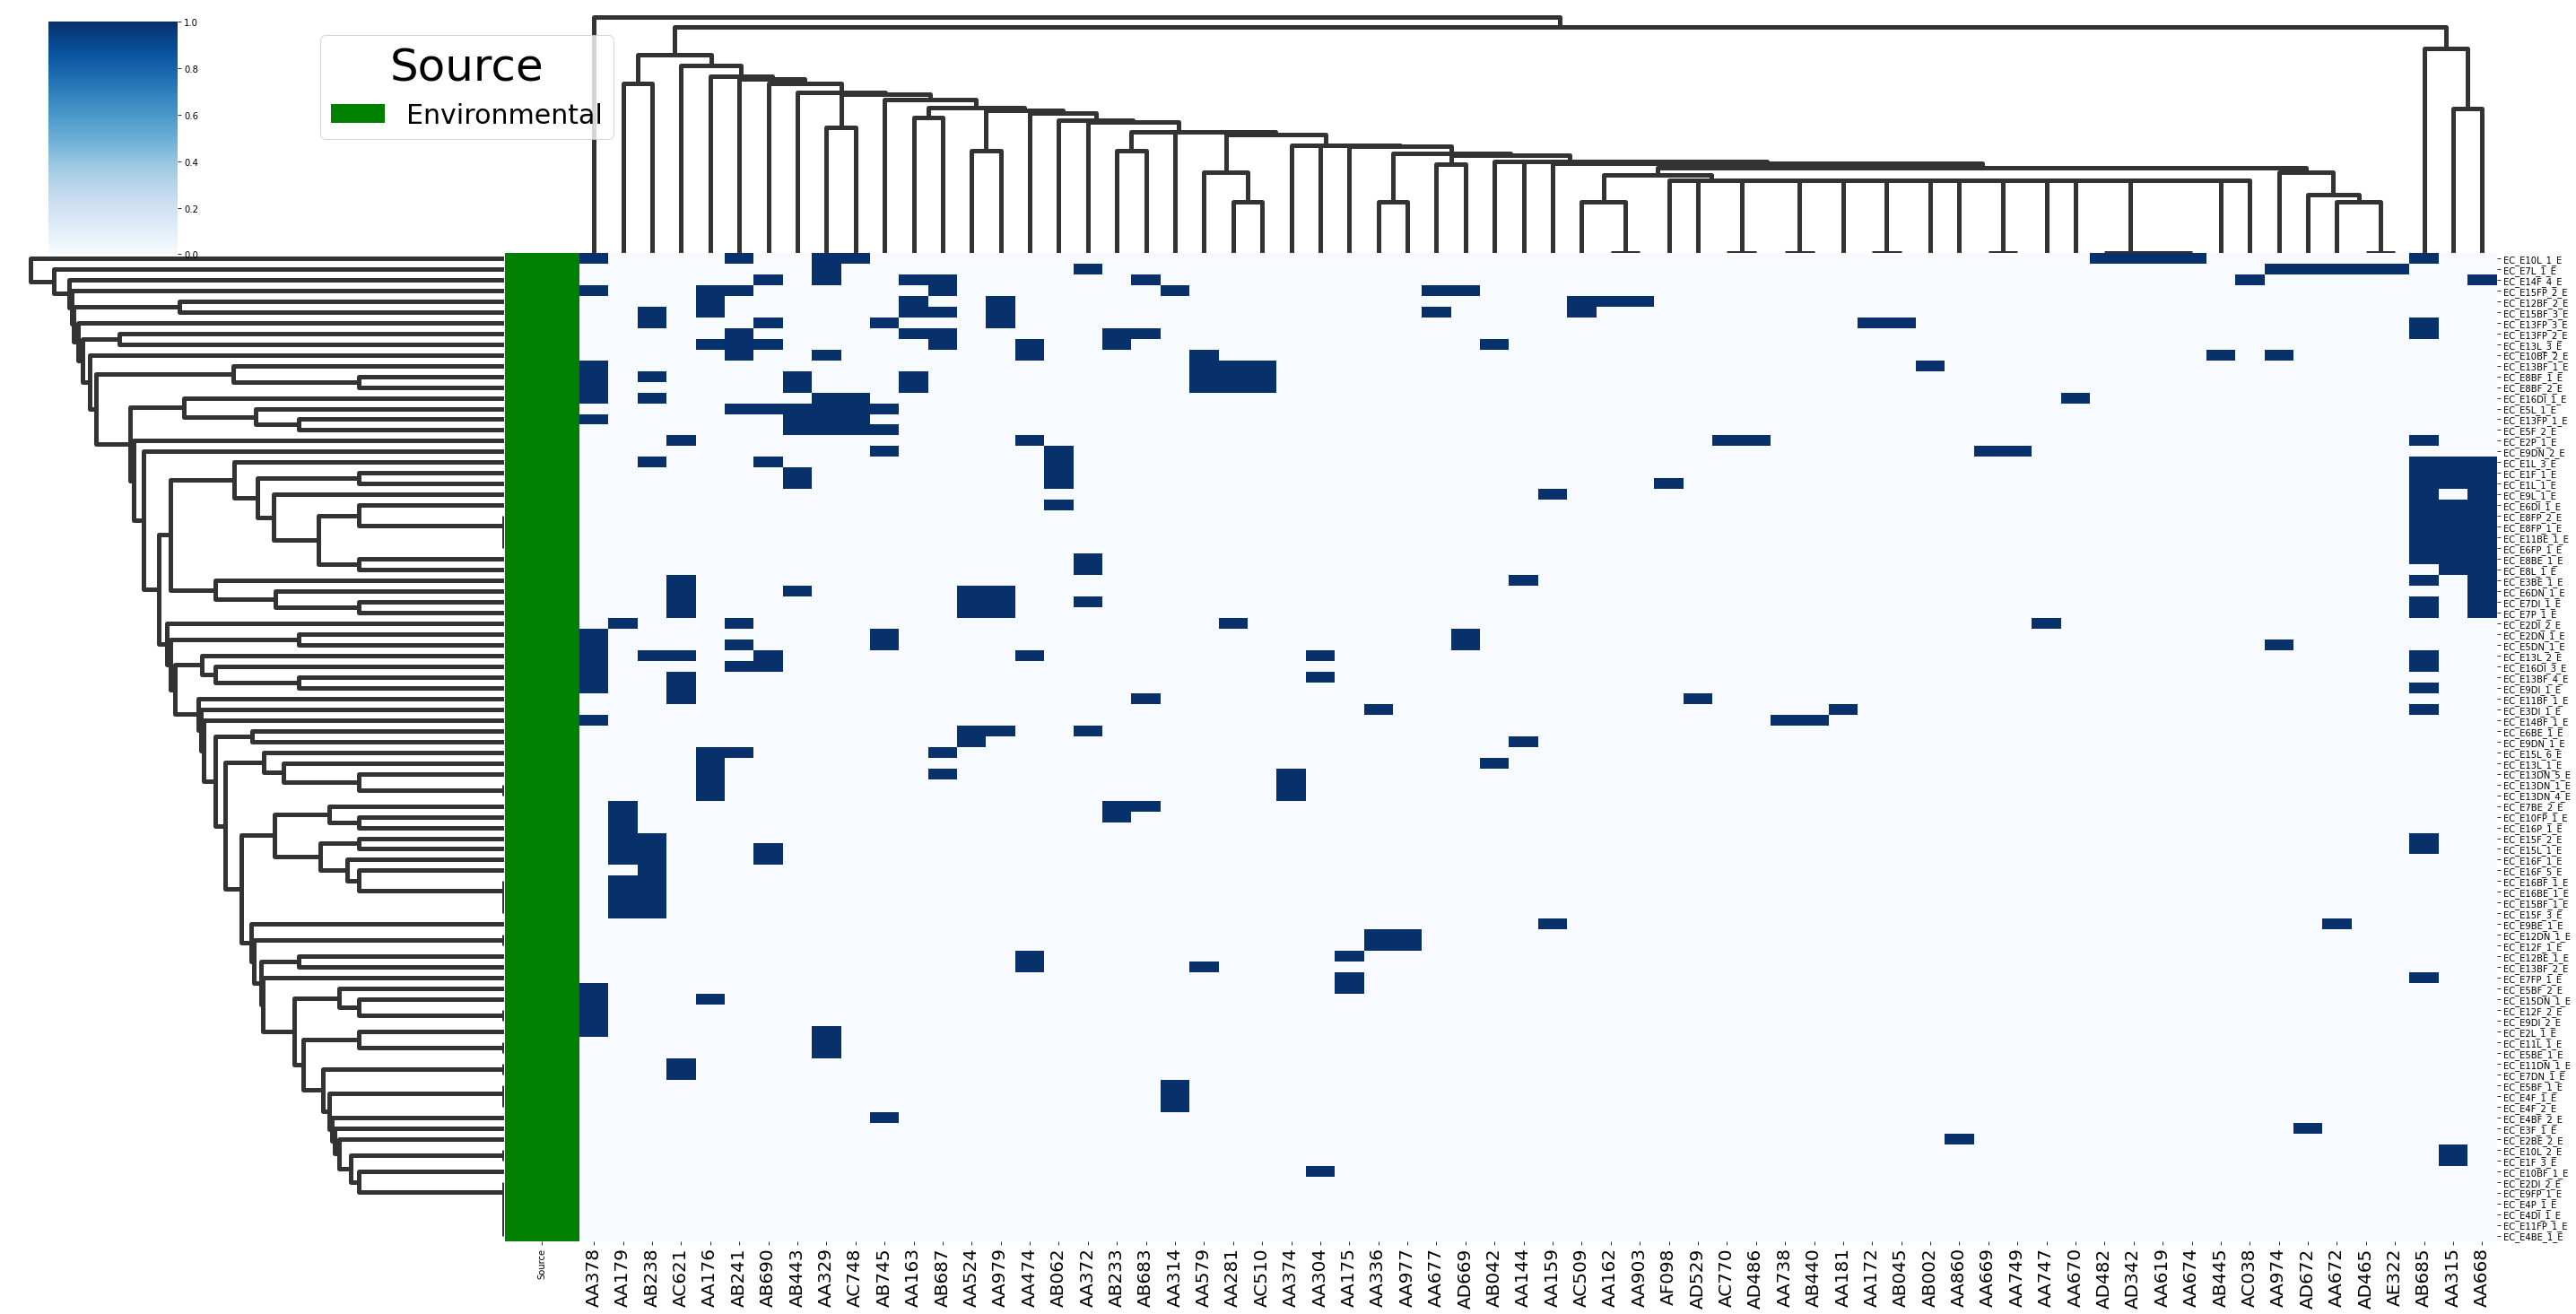

In [39]:
#make the clustermap
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline


NUMERICAL_COLS = mobsuiteE2.columns[1:67]
Source=mobsuiteD["Source"]

pal = sns.color_palette(("g", "r", "b"), len(mobsuiteE2.Source.unique()))
lut = dict(zip(mobsuiteE2.Source.unique(), pal))
sources = mobsuiteE2.Source
colors = pd.Series(sources).map(lut)          

g =sb.clustermap(mobsuiteE2[NUMERICAL_COLS],metric="euclidean", figsize=(40,20),cmap="Blues", standard_scale=1,row_colors=colors, yticklabels= mobsuiteE2['row_0'],row_cluster=True,col_cluster=True,tree_kws=dict(linewidths=5))
g.dendrogram_col.linkage 
g.dendrogram_row.linkage
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 20, rotation = 90)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 10, rotation = 360)
 


handles = [Patch(facecolor=lut[name]) for name in lut]
a = plt.legend(handles, lut, title='Source', loc="upper left", bbox_to_anchor=(2, 1), fontsize= 30)
a.get_title().set_fontsize('50')


plot.savefig("02282022_EcoliARETE_HC_Environmental_Isolates_smaller_font.pdf", dpi =900, bbox_inches= "tight")

In [124]:
mobsuiteDC2 = mobsuiteDC.loc[:, (mobsuiteDC != 0).any(axis=0)]

In [125]:
mobsuiteDC2

,row_0,AA151,AA152,AA155,AA161,AA162,AA163,AA175,AA176,AA178,...,AD672,AD690,AE638,AF190,AF232,AF267,AG401,AH156,Source,Outbreak
0,EC_0012_1H1_D,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,Diseased,F0012
1,EC_0012_2H1_D,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,Diseased,F0012
2,EC_0012_2L1_D,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,Diseased,F0012
3,EC_0012_3S1_D,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,Diseased,F0012
4,EC_0012_C1_H,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Cecal,F0012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,EC_9619_C6_H,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Cecal,F9619
148,EC_9619_C8_H,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Cecal,F9619
235,EC_4957_C6_H,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Cecal,F4957
236,EC_9619_1H1_D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Diseased,F9619


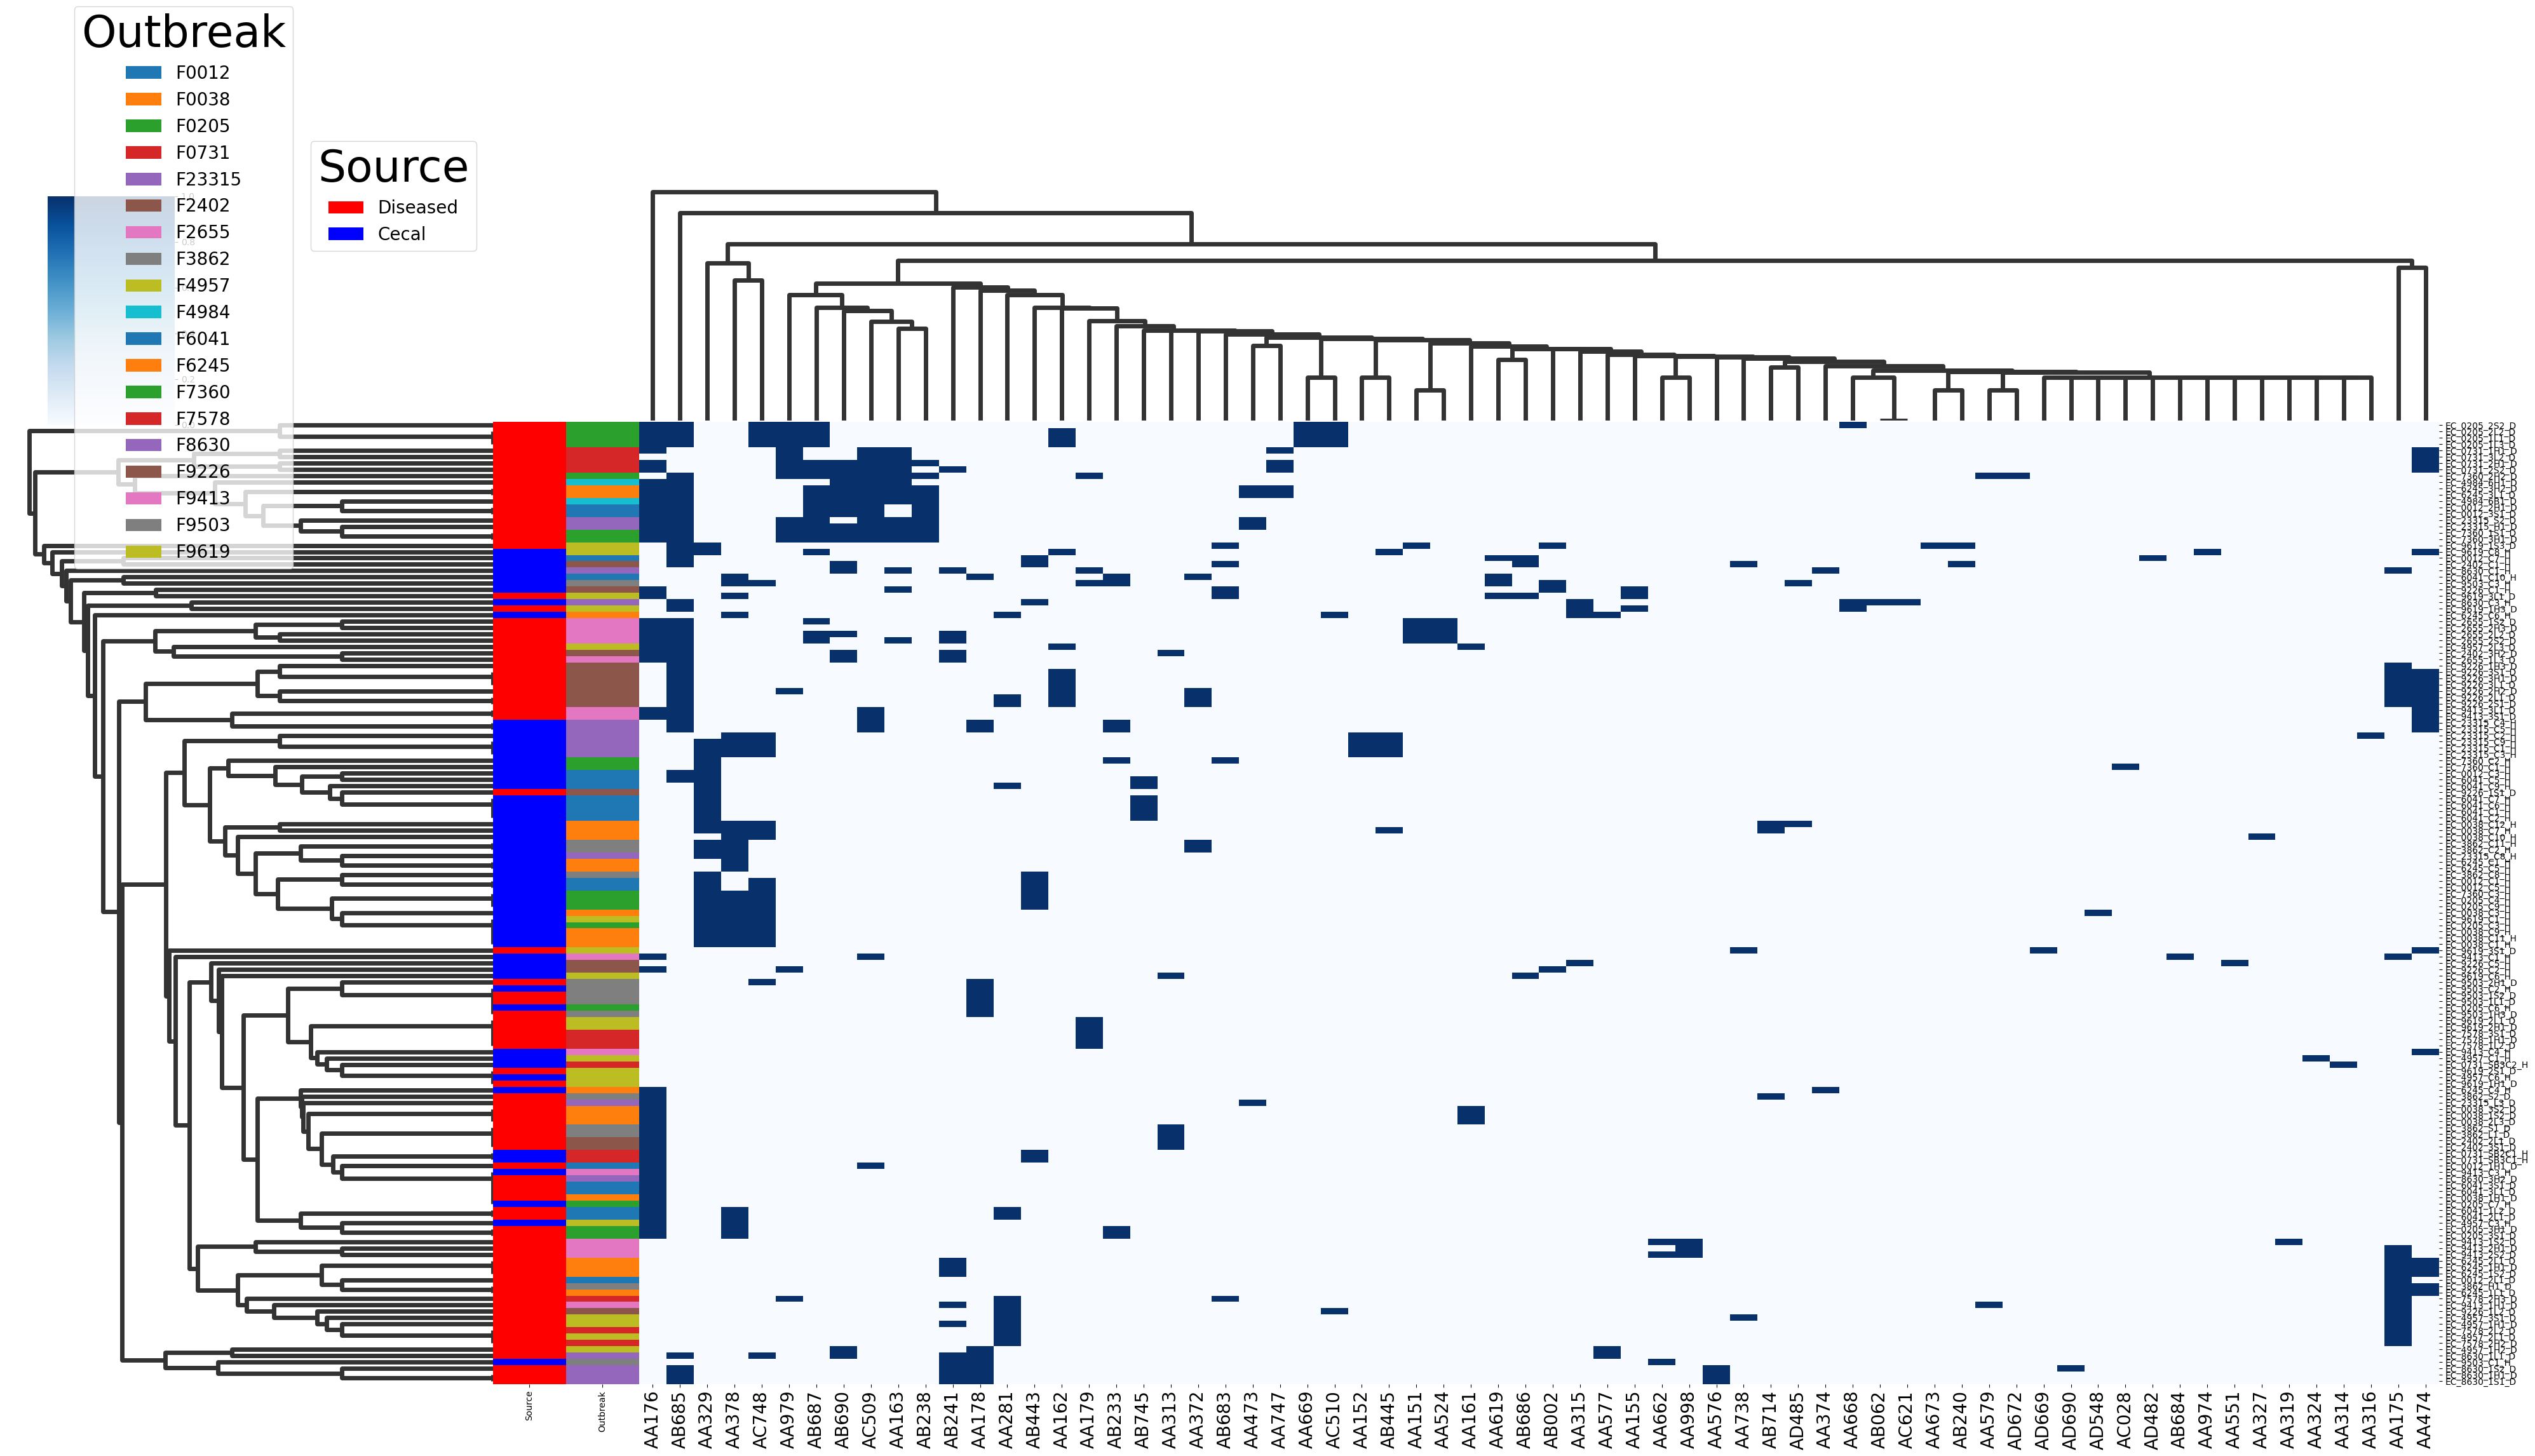

In [130]:
#make the clustermap
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline


NUMERICAL_COLS = mobsuiteDC2.columns[1:67]
Source=mobsuiteDC2["Source"]


pal = sns.color_palette(("r", "b"), len(mobsuiteDC2.Source.unique()))
lut = dict(zip(mobsuiteDC2.Source.unique(), pal))
sources = mobsuiteDC2.Source
colors = pd.Series(sources).map(lut)          

pal2 = sns.color_palette(("tab10"), len(mobsuiteDC2.Outbreak.unique()))
lut2 = dict(zip(mobsuiteDC2.Outbreak.unique(), pal2))
other_variable = mobsuiteDC2.Outbreak
colors2 = pd.Series(other_variable).map(lut2)          
combined_colors = pd.concat([colors, colors2], axis=1)
g =sb.clustermap(mobsuiteDC2[NUMERICAL_COLS],metric="euclidean", figsize=(40,20),cmap="Blues", standard_scale=1,row_colors=combined_colors, yticklabels= mobsuiteDC2['row_0'],col_cluster=True,tree_kws=dict(linewidths=5))
g.dendrogram_col.linkage 
g.dendrogram_row.linkage
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 20, rotation = 90)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 10, rotation = 360)
 


handles = [Patch(facecolor=lut[name]) for name in lut]
a = plt.legend(handles, lut, title='Source', loc="center left", bbox_to_anchor=(2, 1), fontsize= 20)
a.get_title().set_fontsize('50')


handles2 = [Patch(facecolor=lut2[name]) for name in lut2]
legend2 = plt.legend(handles2, lut2, title='Outbreak', loc="center right", bbox_to_anchor=(2, 0.6), fontsize=20)
legend2.get_title().set_fontsize('50')
plt.gca().add_artist(a)


plot.savefig("02282022_EcoliARETE_HC_Diseased_Cecal_Isolates_smaller_font.pdf", dpi =900, bbox_inches= "tight")